# Deployment with Streamlit and Flask

## Make Your Own Model

Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.

Context of our Dataset: Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/campus.csv')

In [3]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Inference

- We have Gender and Educational qualification data
- We have all the educational performance(score) data
- We have the status of placement and salary details
- We can expect null values in salary as candidates who weren't placed would - have no salary
- Status of placement is our target variable rest of them are independent variable except salary

In [4]:
print("The shape of the  data is (row, column):"+ str(placement.shape))
print(placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


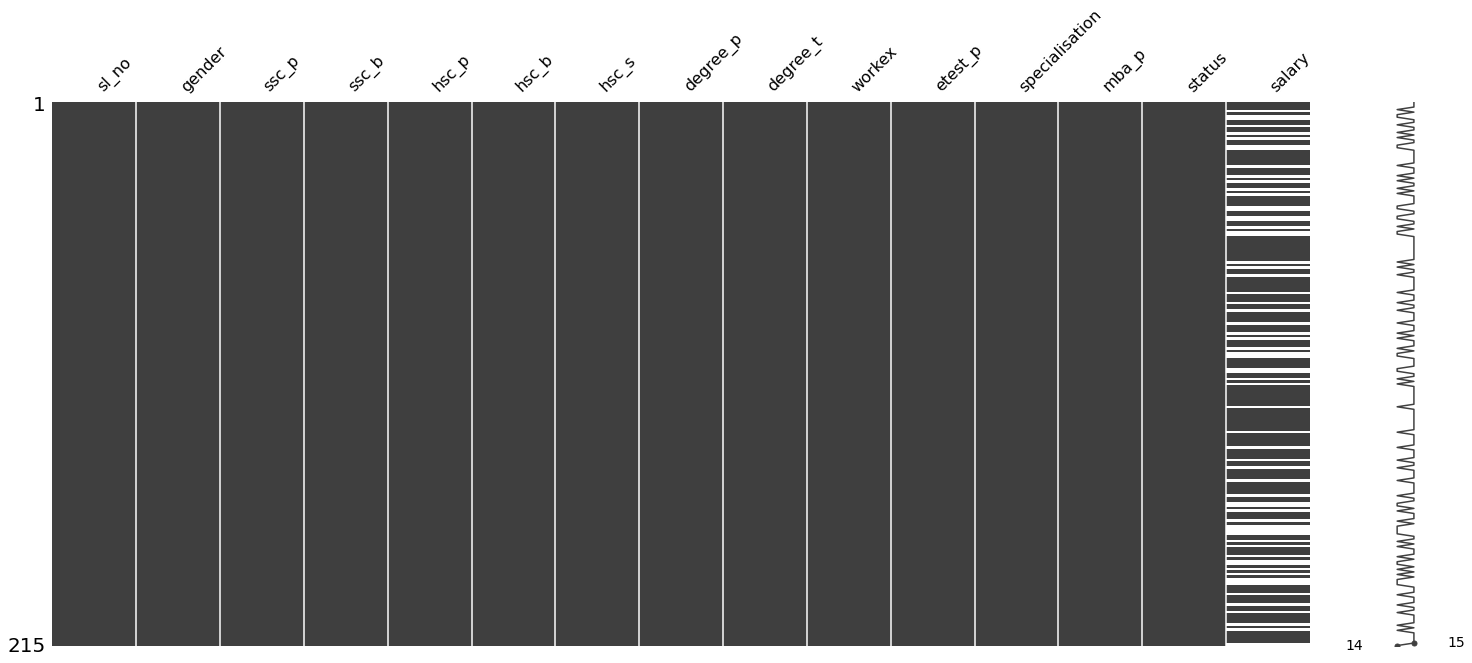

In [5]:
import missingno as msno 
msno.matrix(placement)

In [6]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [7]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:', placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [8]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Preprocessing data for classficiation models**

In [9]:
X=placement_copy.drop(['status', 'salary'],axis=1)
y=placement_copy.status

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 10)
Input Test: (43, 10)
Output Training: (172,)
Output Test: (43,)


In [11]:
X_train

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
47,M,63.00,60.00,Commerce,57.00,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55
202,M,70.00,63.00,Science,66.00,Sci&Tech,No,61.28,Mkt&HR,60.11
27,M,63.00,67.00,Commerce,66.00,Comm&Mgmt,No,68.00,Mkt&HR,57.69
58,M,74.00,62.00,Science,68.00,Comm&Mgmt,No,74.00,Mkt&Fin,57.99
40,F,78.00,77.00,Commerce,80.00,Comm&Mgmt,No,60.00,Mkt&Fin,66.72
...,...,...,...,...,...,...,...,...,...,...
203,M,55.68,61.33,Commerce,56.87,Comm&Mgmt,No,66.00,Mkt&HR,58.30
137,M,67.00,63.00,Commerce,72.00,Comm&Mgmt,No,56.00,Mkt&HR,60.41
72,M,84.86,67.00,Science,78.00,Comm&Mgmt,No,95.50,Mkt&Fin,68.53
140,M,65.00,64.80,Commerce,69.50,Comm&Mgmt,Yes,56.00,Mkt&Fin,56.94


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [14]:
placement_cat = X_train[['gender', 'workex', 'specialisation', 'hsc_s', 'degree_t']]

cat_encoder = OneHotEncoder()
placement_cat_1_hot = cat_encoder.fit_transform(placement_cat)
placement_cat_1_hot

<172x12 sparse matrix of type '<class 'numpy.float64'>'
	with 860 stored elements in Compressed Sparse Row format>

In [15]:
placement_num = X_train[['ssc_p',	'hsc_p', 'degree_p', 'etest_p', 'mba_p']]

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

placement_num_tr = num_pipeline.fit_transform(placement_num)

In [17]:
from sklearn.compose import ColumnTransformer

num_attribs = ['ssc_p',	'hsc_p', 'degree_p', 'etest_p', 'mba_p']
cat_attribs = ['gender', 'workex', 'specialisation', 'hsc_s', 'degree_t']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

placement_prepared = full_pipeline.fit_transform(X_train)

In [18]:
placement_prepared

array([[-0.37802451, -0.57006221, -1.30846321, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2509715 , -0.29435751, -0.05053648, ...,  0.        ,
         0.        ,  1.        ],
       [-0.37802451,  0.07324875, -0.05053648, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.58624017,  0.07324875,  1.62669918, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19831137, -0.12893469,  0.43865726, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.05968066,  0.90036285, -0.10644433, ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
placement_test_prepared = full_pipeline.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(placement_prepared, y_train)

y_pred = logreg.predict(placement_test_prepared)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(placement_test_prepared, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(placement_prepared,y_train)

y_pred = dt.predict(placement_test_prepared)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7441860465116279


In [22]:
from sklearn.ensemble import RandomForestClassifier

rt=RandomForestClassifier(n_estimators=100)
rt.fit(placement_prepared,y_train)

y_pred=rt.predict(placement_test_prepared)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.813953488372093


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1, 1.0, 10.0]}
  ]

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5,
                           scoring='precision',
                           return_train_score=True)

grid_search.fit(placement_prepared, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1.0, 10.0],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='precision')

In [24]:
final_model = grid_search.best_estimator_

In [25]:
some_data = placement.iloc[:5]

In [26]:
some_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [27]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", final_model)
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(some_data)

array([1, 1, 1, 0, 1])

**Save your Model**

In [28]:
import joblib
joblib.dump(full_pipeline_with_predictor, "my_model.pkl")

['my_model.pkl']

## Deployment with Streamlit

```PY
import streamlit as st
import pandas as pd
import joblib

st.header('FTDS Model Deployment')
st.write("""
Created by FTDS Curriculum Team

Use the sidebar to select input features.
""")

@st.cache
def fetch_data():
    df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/campus.csv')
    return df

df = fetch_data()
st.write(df)

st.sidebar.header('User Input Features')

def user_input():
    gender = st.sidebar.selectbox('Gender', df['gender'].unique())
    ssc = st.sidebar.number_input('Secondary School Points', value=67.00)
    hsc = st.sidebar.number_input('High School Points', 0.0, value=91.0)
    hsc_s = st.sidebar.selectbox('High School Spec', df['hsc_s'].unique())
    degree_p = st.sidebar.number_input('Degree Points', 0.0, value=58.0)
    degree_t = st.sidebar.selectbox('Degree Spec', df['degree_t'].unique())
    workex = st.sidebar.selectbox('Work Experience?', df['workex'].unique())
    etest_p = st.sidebar.number_input('Etest Points', 0.0, value=78.00)
    spec = st.sidebar.selectbox('Specialization', df['specialisation'].unique())
    mba_p = st.sidebar.number_input('MBA Points', 0.0, value=54.55)

    data = {
        'gender': gender,
        'ssc_p': ssc,
        'hsc_p': hsc,
        'hsc_s': hsc_s,
        'degree_p': degree_p,
        'degree_t': degree_t,
        'workex': workex,
        'etest_p': etest_p,
        'specialisation':spec,
        'mba_p': mba_p
    }
    features = pd.DataFrame(data, index=[0])
    return features


input = user_input()

st.subheader('User Input')
st.write(input)

load_model = joblib.load("my_model.pkl")

prediction = load_model.predict(input)

if prediction == 1:
    prediction = 'Placed'
else:
    prediction = 'Not Placed'

st.write('Based on user input, the placement model predicted: ')
st.write(prediction)

```

## Heroku Deployment for Streamlit

In this step you’ll install the Heroku Command Line Interface (CLI). You use the CLI to manage and scale your applications, provision add-ons, view your application logs, and run your application locally.

Download and run the installer for your platform from [here](https://devcenter.heroku.com/articles/heroku-cli).

Once installed, you can use the heroku command from your command shell.

On Windows, start the Command Prompt (cmd.exe) or Powershell to access the command shell.

Use the `heroku login` command to log in to the Heroku CLI.

This command opens your web browser to the Heroku login page. If your browser is already logged in to Heroku, simply click the `Log in` button displayed on the page.

This authentication is required for both the heroku and git commands to work correctly.

Create an app on Heroku, which prepares Heroku to receive your source code:

`heroku create`

By default, this will make an app with a random name. If you want to choose your own name, simply pass it as an argument. For example:

`heroku create h8-model`

When you create an app, a git remote (called `heroku`) is also created and associated with your local git repository.

### Prepare the app

In this step, you will prepare a simple application that can be deployed.

Create `.gitignore` file to ignore generated folder such as `__pycache__/` or `ipynb_checkpoints/`.

Inside the `H8Deployment` folder, run following command to create new repository: `git init`

### Create the required Heroku files

You will need two files, placed inside the H8Deployment folder.

1. `requirements.txt` <br />
This tells Heroku which packages to install for your web app. It should look like this:

```py
streamlit
sklearn
pandas
joblib
```

2. `setup.sh`

```sh
mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml
```

3. `Procfile` <br /> 
This tells Heroku what kind of app you are running and how to serve it to users. It is a single line and should look like this:

```procfile
web: sh setup.sh && streamlit run app.py
```

### Add files to repository

While in the `H8Deployment` folder, use the following command to add all your web app's files to the git repository:

```sh
git add .
git commit -m "First commit!"
```

### Set the remote destination for pushing from git to Heroku

This command makes it easier to push your local web app to Heroku, using git. You should change h8-model to whatever you named your Heroku app when you created it.

`heroku git:remote -a h8-model`

### Deploy the app

Now deploy your code:

`git push heroku master`

The application is now deployed. Ensure that at least one instance of the app is running:

`heroku ps:scale web=1`

Now visit the app at the URL generated by its app name. As a handy shortcut, you can open the website as follows:

`heroku open`

## Flask Introduction

Make sure flask is installed with `pip install flask`.

A minimal Flask application looks something like this:

```py
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'
```

So what did that code do?

- First we imported the `Flask` class. An instance of this class will be our WSGI application.
- Next we create an instance of this class. The first argument is the name of the application’s module or package. If you are using a single module (as in this example), you should use `__name__` because depending on if it’s started as application or imported as module the name will be different (`'__main__'` versus the actual import name). This is needed so that Flask knows where to look for templates, static files, and so on.
- We then use the `route()` decorator to tell Flask what URL should trigger our function.
- The function is given a name which is also used to generate URLs for that particular function, and returns the message we want to display in the user’s browser.

Just save it as `hello.py` or something similar. Make sure to not call your application `flask.py` because this would conflict with Flask itself.

To run the application you can either use the flask command or python’s -m switch with Flask. Before you can do that you need to tell your terminal the application to work with by exporting the FLASK_APP environment variable:

```sh
$ export FLASK_APP=hello.py
$ flask run
 * Running on http://127.0.0.1:5000/
```

This launches a very simple builtin server, which is good enough for testing but probably not what you want to use in production.

Now head over to http://127.0.0.1:5000/, and you should see your hello world greeting.

### Debug Mode

The flask script is nice to start a local development server, but you would have to restart it manually after each change to your code. That is not very nice and Flask can do better. If you enable debug support the server will reload itself on code changes, and it will also provide you with a helpful debugger if things go wrong.

To enable all development features (including debug mode) you can export the `FLASK_ENV` environment variable and set it to `development` before running the server:

```sh
$ export FLASK_ENV=development
$ flask run
```

(On Windows you need to use set instead of export.)

This does the following things:

- it activates the debugger
- it activates the automatic reloader
- it enables the debug mode on the Flask application.

You can also control debug mode separately from the environment by exporting `FLASK_DEBUG=1`.

### Routing

Modern web applications use meaningful URLs to help users. Users are more likely to like a page and come back if the page uses a meaningful URL they can remember and use to directly visit a page.

Use the `route()` decorator to bind a function to a URL.

```py
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'
```

You can do more! You can make parts of the URL dynamic and attach multiple rules to a function.

### Variable Rules

You can add variable sections to a URL by marking sections with `<variable_name>`. Your function then receives the <variable_name> as a keyword argument. Optionally, you can use a converter to specify the type of the argument like `<converter:variable_name>`.

```py
from markupsafe import escape

@app.route('/user/<username>')
def show_user_profile(username):
    # show the user profile for that user
    return 'User %s' % escape(username)

@app.route('/post/<int:post_id>')
def show_post(post_id):
    # show the post with the given id, the id is an integer
    return 'Post %d' % post_id

@app.route('/path/<path:subpath>')
def show_subpath(subpath):
    # show the subpath after /path/
    return 'Subpath %s' % escape(subpath)
```

### HTTP Methods

Web applications use different HTTP methods when accessing URLs. You should familiarize yourself with the HTTP methods as you work with Flask. By default, a route only answers to `GET` requests. You can use the methods argument of the `route()` decorator to handle different HTTP methods.

```py
from flask import request

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        return do_the_login()
    else:
        return show_the_login_form()
```

If GET is present, Flask automatically adds support for the `HEAD` method and handles `HEAD` requests according to the HTTP RFC. Likewise, OPTIONS is automatically implemented for you.

### Static Files

Dynamic web applications also need static files. That’s usually where the CSS and JavaScript files are coming from. Ideally your web server is configured to serve them for you, but during development Flask can do that as well. Just create a folder called static in your package or next to your module and it will be available at /static on the application.

To generate URLs for static files, use the special 'static' endpoint name:

`url_for('static', filename='style.css')`

The file has to be stored on the filesystem as static/style.css.

### Rendering Templates

Generating HTML from within Python is not fun, and actually pretty cumbersome because you have to do the HTML escaping on your own to keep the application secure. Because of that Flask configures the Jinja2 template engine for you automatically.

To render a template you can use the `render_template()` method. All you have to do is provide the name of the template and the variables you want to pass to the template engine as keyword arguments. Here’s a simple example of how to render a template:

```py
from flask import render_template

@app.route('/hello/')
@app.route('/hello/<name>')
def hello(name=None):
    return render_template('hello.html', name=name)
```

Flask will look for templates in the templates folder. So if your application is a module, this folder is next to that module, if it’s a package it’s actually inside your package:

Case 1: a module:

```dir
/application.py
/templates
    /hello.html
```

Case 2: a package:

```dir
/application
    /__init__.py
    /templates
        /hello.html
```

For templates you can use the full power of Jinja2 templates. Head over to the official Jinja2 Template Documentation for more information.

Here is an example template:

```html
<!doctype html>
<title>Hello from Flask</title>
{% if name %}
  <h1>Hello {{ name }}!</h1>
{% else %}
  <h1>Hello, World!</h1>
{% endif %}
```

Inside templates you also have access to the request, session and g 1 objects as well as the get_flashed_messages() function.

Templates are especially useful if inheritance is used. Basically template inheritance makes it possible to keep certain elements on each page (like header, navigation and footer).

Automatic escaping is enabled, so if name contains HTML it will be escaped automatically. If you can trust a variable and you know that it will be safe HTML (for example because it came from a module that converts wiki markup to HTML) you can mark it as safe by using the Markup class or by using the |safe filter in the template.

## REST API Introduction

**What is an API?**

To build interactive and scalable applications, it is natural for programs to be able to communicate with each other. An API (shorthand for Application Programming Interface) is a set of rules to facilitate this communication between different programs. These programs can be a software library (eg Python API), an OS or a web server (a web API).

One key advantage of an API is that the requester doesn’t need to know the inner workings of the software used by the responder and vice-versa. This allows services using different technologies to communicate in a standard way.

**What is a REST API?**

REST stands for Representational State Transfer. It is an architectural Style for designing networked applications (i.e apps that use some form a network to communicate). It is the most popular style for building web APIs. REST determines specifications of the API through a set of rules that are followed when a REST API is created.

REST treats any data (e.g. image, video, text, etc) as a resource that the client can fetch/edit/delete. REST mandates that a client should be able to perform the appropriate operation by accessing a specific URL and sending a request. The server then sends an appropriate response.

Think of it as a contract between the programs: the requester (aka the client) and the responder (aka the server). If the requester sends X to the responder, the responder will give the requester Y. X and Y are specified in contract between the two parties and explained in the documentation for the API.

**Methods of REST API**

All of us working with the technology of the web, do CRUD operations. When I say CRUD operations, I mean that we create a resource, read a resource, update a resource and delete a resource. Now, to do these actions, you can actually use the HTTP methods, which are nothing but the REST API Methods. 

- POST: Create
- GET: Read
- PUT: Update
- DELETE: Delete


## Deployment with Flask

Let’s look at the code for encapsulating the same into a Flask API also embedding some UI components from flasgger

### Let’s first declare our flask app and it to Swagger interface

```py
import pandas as pd
from flask import Flask, jsonify, request
import joblib
from flasgger import Swagger

app = Flask(__name__)
Swagger(app)
```

Now we will define an app route for an API which essentially means whenever we visit http://127.0.0.1:5000/predict_home this function will be executed in which we have hard-coded feature values and generated predictions from our model.

```py
@app.route('/predict_home/',methods = ['GET']) 
def get_predictions_home():
    
    data = {
        'gender': 'M',
        'ssc_p': 67.00,
        'hsc_p': 91.00,
        'hsc_s': 'Commerce',
        'degree_p': 58.00,
        'degree_t': 'Sci&Tech',
        'workex': 'No',
        'etest_p': 55.0,
        'specialisation': 'Mkt&HR',
        'mba_p': 58.80
    }

    features = pd.DataFrame(data, index=[0])
    
    model = joblib.load('my_model.pkl')
    
    preds = model.predict(features)
    
    return jsonify({"class_name":str(preds)})        
    
if __name__=='__main__':
    app.run(debug = True)
```

Now we need to start the flask server by running python app.py
in the terminal and open the mentioned http://127.0.0.1:5000/predict_home/ in the browser.

### Adding Simple UI Elements to interact with this Flask API

Now we will define another app route in our code which would have a function containing the UI elements as well in the form of the docstring.

We will add all input fields with names gender, ssc_p, hsc_p, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p so that we can take inputs from the user itself.

> Please Note – in the docstring please maintain the indentation level.

Here is the detailed code snippet for the function:

```py
@app.route('/predict',methods = ['GET']) 
def get_predictions():
    
    """
    An API that returns the predicted placement given the parameters named gender, ssc_p, hsc_p, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p.
    ---
    
        
    parameters:
       - name: gender
         in: query
         type: string
         required: true
       - name: ssc_p
         in: query
         type: number
         required: true
       - name: hsc_p
         in: query
         type: number
         required: true
       - name: hsc_s
         in: query
         type: string
         required: true
       - name: degree_p
         in: query
         type: number
         required: true
       - name: degree_t
         in: query
         type: string
         required: true
       - name: workex
         in: query
         type: string
         required: true
       - name: etest_p
         in: query
         type: number
         required: true
       - name: specialisation
         in: query
         type: string
         required: true
       - name: mba_p
         in: query
         type: number
         required: true
                          
    responses:
        
        
        200:
            description : predicted Class
    """
        
    ## Getting Features from Swagger UI
    gender = request.args.get("gender")
    ssc_p = float(request.args.get("ssc_p"))
    hsc_p = float(request.args.get("hsc_p"))
    hsc_s = request.args.get("hsc_s")
    degree_p = float(request.args.get("degree_p"))
    degree_t = request.args.get("degree_t")
    workex = request.args.get("workex")
    etest_p = float(request.args.get("etest_p"))
    specialisation = request.args.get("specialisation")
    mba_p = float(request.args.get("mba_p"))

    data = {
        'gender': gender,
        'ssc_p': ssc_p,
        'hsc_p': hsc_p,
        'hsc_s': hsc_s,
        'degree_p': degree_p,
        'degree_t': degree_t,
        'workex': workex,
        'etest_p': etest_p,
        'specialisation':specialisation,
        'mba_p': mba_p
    }
    features = pd.DataFrame(data, index=[0])

    model = joblib.load('my_model.pkl')
    
    preds = model.predict(features)
    
    return jsonify({"class_name":str(preds)})
```

Now we need to save the code and restart the server once again and visit http://127.0.0.1:5000/apidocs/ and we can see the output.


**Full Code:**

```py
import pandas as pd
from flask import Flask, jsonify, request
import joblib
from flasgger import Swagger

app = Flask(__name__)
Swagger(app)

@app.route('/predict',methods = ['GET']) 
def get_predictions():
    
    """
    A simple Test API that returns the predicted class given the parameters named gender, ssc_p, hsc_p, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p.
    ---
    
        
    parameters:
       - name: gender
         in: query
         type: string
         required: true
       - name: ssc_p
         in: query
         type: number
         required: true
       - name: hsc_p
         in: query
         type: number
         required: true
       - name: hsc_s
         in: query
         type: string
         required: true
       - name: degree_p
         in: query
         type: number
         required: true
       - name: degree_t
         in: query
         type: string
         required: true
       - name: workex
         in: query
         type: string
         required: true
       - name: etest_p
         in: query
         type: number
         required: true
       - name: specialisation
         in: query
         type: string
         required: true
       - name: mba_p
         in: query
         type: number
         required: true
                          
    responses:
        
        
        200:
            description : predicted Class
    """
        
    ## Getting Features from Swagger UI
    gender = request.args.get("gender")
    ssc_p = float(request.args.get("ssc_p"))
    hsc_p = float(request.args.get("hsc_p"))
    hsc_s = request.args.get("hsc_s")
    degree_p = float(request.args.get("degree_p"))
    degree_t = request.args.get("degree_t")
    workex = request.args.get("workex")
    etest_p = float(request.args.get("etest_p"))
    specialisation = request.args.get("specialisation")
    mba_p = float(request.args.get("mba_p"))

    data = {
        'gender': gender,
        'ssc_p': ssc_p,
        'hsc_p': hsc_p,
        'hsc_s': hsc_s,
        'degree_p': degree_p,
        'degree_t': degree_t,
        'workex': workex,
        'etest_p': etest_p,
        'specialisation':specialisation,
        'mba_p': mba_p
    }
    features = pd.DataFrame(data, index=[0])

    model = joblib.load('my_model.pkl')
    
    preds = model.predict(features)
    
    return jsonify({"class_name":str(preds)})


@app.route('/predict_home/',methods = ['GET']) 
def get_predictions_home():
    
    data = {
        'gender': 'M',
        'ssc_p': 67.00,
        'hsc_p': 91.00,
        'hsc_s': 'Commerce',
        'degree_p': 58.00,
        'degree_t': 'Sci&Tech',
        'workex': 'No',
        'etest_p': 55.0,
        'specialisation': 'Mkt&HR',
        'mba_p': 58.80
    }

    features = pd.DataFrame(data, index=[0])
    
    model = joblib.load('my_model.pkl')
    
    preds = model.predict(features)
    
    return jsonify({"class_name":str(preds)})        
    
if __name__=='__main__':
    app.run(debug = True)
    
## Visit Base URL /apidocs/
```

## Heroku Deployment for Flask

In this step you’ll install the Heroku Command Line Interface (CLI). You use the CLI to manage and scale your applications, provision add-ons, view your application logs, and run your application locally.

Download and run the installer for your platform from [here](https://devcenter.heroku.com/articles/heroku-cli).

Once installed, you can use the heroku command from your command shell.

On Windows, start the Command Prompt (cmd.exe) or Powershell to access the command shell.

Use the `heroku login` command to log in to the Heroku CLI.

This command opens your web browser to the Heroku login page. If your browser is already logged in to Heroku, simply click the `Log in` button displayed on the page.

This authentication is required for both the heroku and git commands to work correctly.

Create an app on Heroku, which prepares Heroku to receive your source code:

`heroku create`

By default, this will make an app with a random name. If you want to choose your own name, simply pass it as an argument. For example:

`heroku create h8-model`

When you create an app, a git remote (called `heroku`) is also created and associated with your local git repository.

### Prepare the app

In this step, you will prepare a simple application that can be deployed.

Create `.gitignore` file to ignore generated folder such as `__pycache__/` or `ipynb_checkpoints/`.

Inside the `H8Deployment` folder, run following command to create new repository: `git init`

### Create the required Heroku files

You will need two files, placed inside the H8Deployment folder.

1. `requirements.txt` <br />
This tells Heroku which packages to install for your web app. It should look like this:

```txt
flask
pandas
sklearn
joblib
flasgger
gunicorn
```

2. `Procfile` <br /> 
This tells Heroku what kind of app you are running and how to serve it to users. It is a single line and should look like this: `web: gunicorn app:app`

### Add files to repository

While in the `H8Deployment` folder, use the following command to add all your web app's files to the git repository:

```sh
git add .
git commit -m "First commit!"
```

### Set the remote destination for pushing from git to Heroku

This command makes it easier to push your local web app to Heroku, using git. You should change h8-model to whatever you named your Heroku app when you created it.

`heroku git:remote -a h8-model`

### Deploy the app

Now deploy your code:

`git push heroku master`

The application is now deployed. Ensure that at least one instance of the app is running:

`heroku ps:scale web=1`

Now visit the app at the URL generated by its app name. As a handy shortcut, you can open the website as follows:

`heroku open`

